<a href="https://colab.research.google.com/github/alberthtan/NBA-shot-predictions/blob/main/Final_Albert_Tan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# ACQUIRE DATA
url = 'https://raw.githubusercontent.com/alberthtan/NBA-shot-predictions/main/shot_logs.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
print(df)


         GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  \
0       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
1       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
2       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
3       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
4       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
...          ...                       ...      ... ..           ...   
128064  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128065  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128066  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128067  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128068  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   

        SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  \
0                 1       1       1:09        10.8         

Data Preprocessing

In [ ]:
# Isolate variables of interest
df = df[['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FGM']]

# Drop rows with missing values
df = df.dropna()
print(df)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(df)
cols = ['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FGM']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

        SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST  FGM
0             10.8         2         1.9        7.7             1.3    1
1              3.4         0         0.8       28.2             6.1    0
3             10.3         2         1.9       17.2             3.4    0
4             10.9         2         2.7        3.7             1.1    0
5              9.1         2         4.4       18.4             2.6    0
...            ...       ...         ...        ...             ...  ...
128063        15.3         2         1.6        8.9             5.7    1
128064        18.3         5         6.2        8.7             0.8    0
128065        19.8         4         5.2        0.6             0.6    1
128066        23.0         2         4.2       16.9             4.2    1
128067         9.1         4         4.5       18.3             3.0    0

[122502 rows x 6 columns]
   SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST  FGM
0    0.450000    0.0625    0.

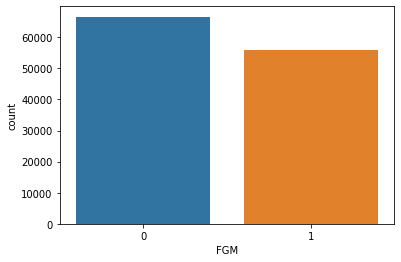

In [ ]:
sns.countplot(x='FGM', data=df)
plt.show()

In [ ]:
# Split into training and testing
X = df.drop(labels='FGM', axis=1)
y = df['FGM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
# Create dummy model
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_acc = dummy.score(X_test, y_test)
print('Baseline accuracy:', baseline_acc)

Baseline accuracy: 0.5438491469619874


In [ ]:
# Explore different models

# 1. Logistic regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_accuracy = metrics.accuracy_score(y_pred, y_test)
print(log_accuracy)


0.6083099779597834


In [ ]:
# 2. Decision Trees
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_pred, y_test)
print(dt_accuracy)

ada_boost = AdaBoostClassifier(dt, n_estimators=20, learning_rate=0.001)
ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)
ada_accuracy = metrics.accuracy_score(y_test, ada_pred)
print(ada_accuracy)

print('Feature Importance:', dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(imp.nlargest(3, 1))

0.6103235286114663
0.6114663546570162
Feature Importance: [0.11447837 0.0330313  0.12936791 0.49468512 0.22843729]
                0         1
3       SHOT_DIST  0.494685
4  CLOSE_DEF_DIST  0.228437
2      TOUCH_TIME  0.129368


In [ ]:
# 3. Ensemble Methods (Bagging and Random Forest)
model_bagging = BaggingClassifier(n_estimators=20)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = metrics.accuracy_score(y_test, pred_bagging)
print(acc_bagging)


model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, pred_rf)
print(acc_rf)


0.5796576963892139
0.5864874425185709


In [ ]:
# # 4. Voting Classifier

clf = VotingClassifier(estimators = [('dt', dt), ('rf',model_rf), ('log', log_model), ('bag', model_bagging)], voting='soft', weights=[3, 1, 20, 1]) 
clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)
acc_clf = metrics.accuracy_score(y_test, clf_pred)
print(acc_clf)

0.6121466082555577


In [ ]:
# Fine tune hyperparameters (alpha) and simplify model (regularization, pruning, drop-out)

# The Decision tree/ADA boost had close to the best results, so we will try and manually find the best MAX_DEPTH and MIN_SAMPLES_LEAF (pruning)

max_accuracy = 0.0
max_depth = 0
min_samples_leaf = 0
for i in range(1, 10):
  for j in range(1, 40):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_leaf=j)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = metrics.accuracy_score(y_pred, y_test)
    if accuracy > max_accuracy:
      max_accuracy = accuracy
      max_depth = i
      min_samples_leaf = j
      print(max_accuracy, i, j)

0.6072487823460586 1 1
0.6099153764523414 3 1
0.6154662458164404 4 1
0.61742537618024 6 1
0.6174525863241817 6 2
0.6174797964681233 6 3
0.6175070066120649 6 14
0.6175614268999483 6 15
0.617670267475715 6 17


In [ ]:
# Fine tune alpha for ADA boost
my_dt = DecisionTreeClassifier(criterion='gini', max_depth =max_depth, min_samples_leaf=min_samples_leaf)

max_accuracy = 0
my_ada_boost = AdaBoostClassifier(my_dt)

for i in range (1, 50, 2):
  ada_boost = AdaBoostClassifier(my_dt, n_estimators=10, learning_rate=i/100)
  ada_boost.fit(X_train, y_train)
  ada_pred = ada_boost.predict(X_test)  
  accuracy = metrics.accuracy_score(y_test, ada_pred)
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    my_ada_boost = ada_boost
    print(accuracy, i)

0.6178607384833066 1
0.6179423689151315 3
0.6182961007863732 7
0.6191668253925063 11
0.6193300862561563 19


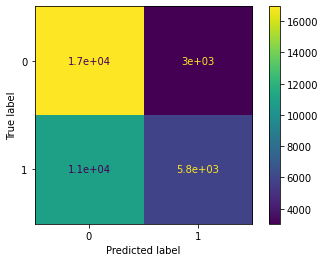

In [ ]:
metrics.plot_confusion_matrix(my_ada_boost, X_test, y_test)
plt.show()

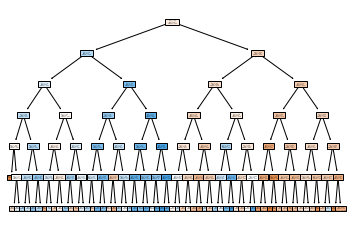

In [ ]:
my_dt.fit(X_train, y_train)
my_tree = tree.plot_tree(my_dt, filled=True)
plt.savefig('my_tree.png')
plt.show()

Text(0.5, 1.0, 'Accuracy of Various ML Models')

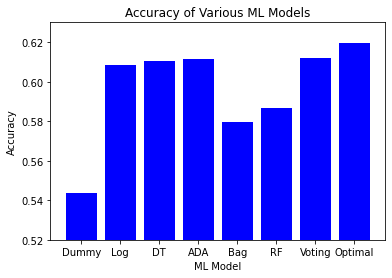

In [26]:
model = ['Dummy', 'Log', 'DT', 'ADA', 'Bag', 'RF', 'Voting', 'Optimal']

accuracy = [baseline_acc, log_accuracy, dt_accuracy, ada_accuracy, acc_bagging, acc_rf, acc_clf, max_accuracy]

plt.bar(model, accuracy, color='b')
plt.ylim(0.52, 0.63)

plt.xlabel('ML Model')
plt.ylabel('Accuracy')

plt.title('Accuracy of Various ML Models')